`251202_banknote_auth.ipynb`에 작성하세요. # 137

# 지폐 위조 판별 성능 향상 비교 실험  

**Dataset: Banknote Authentication (Kaggle)**  
https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data

[우리반 노션 - Datasets Wiki](https://www.notion.so/shqkel/2bd9cb46e5e280208276dffaada6cfba?source=copy_link)

<img src="https://d.pr/i/FoSZqa+"/>

---

- [ ] 1. 데이터 로드 및 확인
  - CSV 파일을 로드하고 컬럼명(`variance`, `skewness`, `curtosis`, `entropy`, `label`)을 지정하라.  
  - 데이터의 기본 통계값과 라벨 분포를 확인하라.
    - 데이터 shape  
    - label 분포  
    - 컬럼 의미 요약


- [ ] 2. 데이터 분할 및 스케일링
  - 데이터를 train/test = 8:2로 분할하라.  
  - `StandardScaler`로 스케일링하라.  
  - 스케일링 전/후 값을 비교하라.
  

- [ ] 3. Logistic Regression 모델 학습 및 성능 평가
  - LogisticRegression 모델을 학습시키고 성능평가 출력하라.


- [ ] 4. SVM(RBF Kernel) 모델 학습 및 성능 평가
  - RBF SVM을 학습하고 정확도를 출력하라.  
  - Logistic Regression과 성능 차이를 비교하라.
  - 두 모델의 차이가 발생하는 이유를 설명하라.

- [ ] 5. 두 모델 성능 비교표 작성
  - 아래 형식을 따라 성능평가 표를 작성하라.

| 모델 | 정확도 | 장점 | 단점 |
|------|--------|--------|--------|
| Logistic Regression | ? | ? | ? |
| SVM (RBF) | ? | ? | ? |

- 모델별 성능 비교 그래프 (bar chart)를 시각화 하라


In [4]:
!pip install pandas numpy matplotlib seaborn scikit-learn


--- [1. 데이터 로드 및 확인] ---
데이터 로드 성공! Shape: (1372, 5)
사용된 컬럼명: ['variance', 'skewness', 'curtosis', 'entropy', 'class']

[상위 5개 데이터]
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

[기본 통계값]
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
m

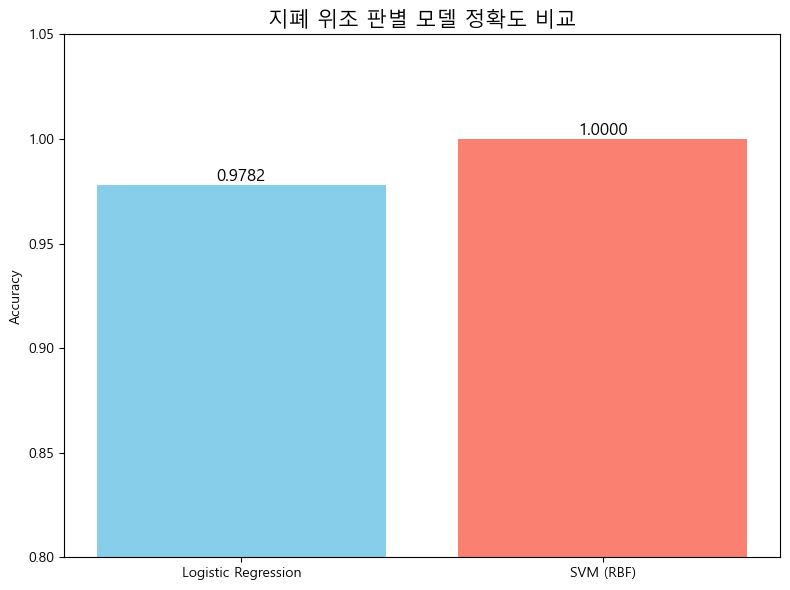


실험 종료.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 한글 폰트 설정
import platform
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ==========================================
# 1. 데이터 로드 및 확인
# ==========================================
print("\n--- [1. 데이터 로드 및 확인] ---")
filename = 'data/banknote_authentication.csv'

try:
    # 수정 1: 파일에 헤더가 있으므로 header=None 옵션 제거
    df = pd.read_csv(filename)
    
    # 공백 제거 (혹시 컬럼명에 공백이 있을 경우를 대비)
    df.columns = df.columns.str.strip()
    
    print(f"데이터 로드 성공! Shape: {df.shape}")
    print(f"사용된 컬럼명: {list(df.columns)}")
    
    print("\n[상위 5개 데이터]")
    print(df.head())
    
    print("\n[기본 통계값]")
    print(df.describe())
    
    # 수정 2: 'label' 대신 'class' 사용
    print("\n[Label(class) 분포]")
    print(df['class'].value_counts())

except FileNotFoundError:
    print(f"오류: '{filename}' 파일을 찾을 수 없습니다.")
    exit()
except KeyError as e:
    print(f"오류: 컬럼명을 찾을 수 없습니다. {e}")
    print(f"현재 파일의 컬럼 목록: {df.columns}")
    exit()

# ==========================================
# 2. 데이터 분할 및 스케일링
# ==========================================
print("\n--- [2. 데이터 분할 및 스케일링] ---")

# 수정 3: 'label' 대신 'class'를 타겟으로 지정
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"스케일링 전 (X_train[0]): {X_train.iloc[0].values}")
print(f"스케일링 후 (X_train_scaled[0]): {X_train_scaled[0]}")

# ==========================================
# 3. Logistic Regression 모델 학습 및 평가
# ==========================================
print("\n--- [3. Logistic Regression 학습] ---")

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_acc = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression 정확도: {lr_acc:.4f}")
print("\n[Classification Report]")
print(classification_report(y_test, lr_pred))

# ==========================================
# 4. SVM (RBF Kernel) 모델 학습 및 평가
# ==========================================
print("\n--- [4. SVM (RBF) 학습] ---")

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_acc = accuracy_score(y_test, svm_pred)

print(f"SVM (RBF) 정확도: {svm_acc:.4f}")
print("\n[Classification Report]")
print(classification_report(y_test, svm_pred))

# ==========================================
# 5. 성능 비교 (표 및 시각화)
# ==========================================
print("\n--- [5. 모델 성능 비교] ---")

results = pd.DataFrame({
    '모델': ['Logistic Regression', 'SVM (RBF)'],
    '정확도': [lr_acc, svm_acc],
    '장점': ['학습 빠름, 해석 용이', '비선형 패턴 학습 우수'],
    '단점': ['비선형 데이터 취약', '학습 느림, 해석 난해']
})

print(results[['모델', '정확도', '장점', '단점']])

plt.figure(figsize=(8, 6))
bars = plt.bar(results['모델'], results['정확도'], color=['skyblue', 'salmon'])

plt.title('지폐 위조 판별 모델 정확도 비교', fontsize=15)
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.05)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.4f}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

print("\n실험 종료.")